<a href="https://colab.research.google.com/github/brungardtdb/TF_Heaviside_Function/blob/master/Heaviside_Function_Model-attempt-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
''' this program is my attempt at training a deep learning model using
tensorflow 2.0 to mimic the Heaviside function.

H[n] = { 0, n < 0
         1, n >= 1}
'''
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [205]:
# array inputs for model
hSideInput = np.array([-1000.00,-60.2,20.75,-3.0,2.0,0.0,1.6,-5.1,60.5, 1000], dtype = float)
hSideOutput = np.array([0,0,1,0,1,1,1,0,1,1], dtype = int)

# loop through values in arrays matching input with output
for i,c in enumerate(hSideInput):
  print("{} input = {} output in Heaviside Function".format(c, hSideOutput[i]))

-1000.0 input = 0 output in Heaviside Function
-60.2 input = 0 output in Heaviside Function
20.75 input = 1 output in Heaviside Function
-3.0 input = 0 output in Heaviside Function
2.0 input = 1 output in Heaviside Function
0.0 input = 1 output in Heaviside Function
1.6 input = 1 output in Heaviside Function
-5.1 input = 0 output in Heaviside Function
60.5 input = 1 output in Heaviside Function
1000.0 input = 1 output in Heaviside Function


In [0]:
# create model
heavisideModel = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

In [0]:
# compile model
heavisideModel.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.01))
# Note: using a loss optimizer of 0.1 did not effect the loss magnitude at an acceptable level, 0.01 seemed to work.

In [208]:
# fit model
modelHistory = heavisideModel.fit(hSideInput, hSideOutput, epochs=700,verbose=False)
print("Finished training the model")

Finished training the model


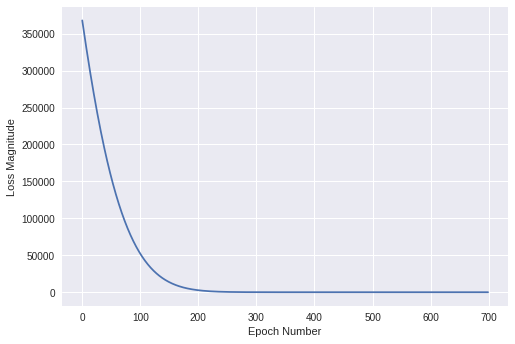

In [209]:
# plot loss rate over number of Epochs
import matplotlib.pyplot as plt

plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(modelHistory.history['loss'])

In [210]:
print(heavisideModel.predict([100.00]))

# model predicted 0.65 when it should have been 1, not terribly accurate

[[0.6529426]]


In [0]:
# another attempt using more layers

firstlayer = tf.keras.layers.Dense(units=6, input_shape=[1])
secondlayer = tf.keras.layers.Dense(units=6)
thirdlayer = tf.keras.layers.Dense(units=1)

In [0]:
# create model with 3 layers
heavisideModel = tf.keras.Sequential([firstlayer,secondlayer,thirdlayer])

In [0]:
# compile model
heavisideModel.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.01))

In [214]:
# fit model
modelHistory = heavisideModel.fit(hSideInput, hSideOutput, epochs=700,verbose=False)
print("Finished training the model")

Finished training the model


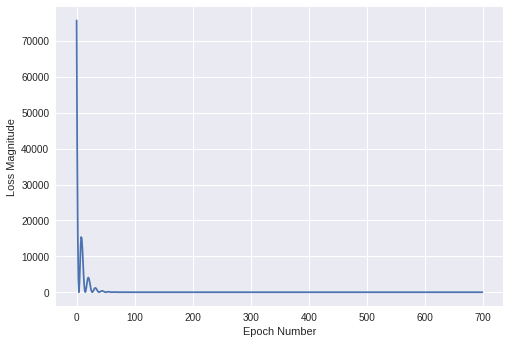

In [215]:
# plot loss rate over number of Epochs
import matplotlib.pyplot as plt

plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(modelHistory.history['loss'])

In [216]:
# predict value using model
print(heavisideModel.predict([100.00]))
print(heavisideModel.predict([-2000.00]))
print(heavisideModel.predict([50.00]))
print(heavisideModel.predict([-2]))
print(heavisideModel.predict([-1]))
print(heavisideModel.predict([0]))
print(heavisideModel.predict([2]))

[[0.6526615]]
[[-0.47162297]]
[[0.6258871]]
[[0.5980441]]
[[0.5985796]]
[[0.5991151]]
[[0.6001858]]
